## CARGA Y EXPLORACIÓN DEL DATASET


In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["MedHouseVal"] = data.target

In [ ]:
print("Primeras filas del dataset:")
print(df.head())

Primeras filas del dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [ ]:
print("\nInformación del dataset:")
print(df.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [ ]:
print("\nEstadísticas descriptivas:")
print(df.describe())


Estadísticas descriptivas:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min 

In [ ]:
print("\nValores nulos:")
print(df.isnull().sum())


Valores nulos:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


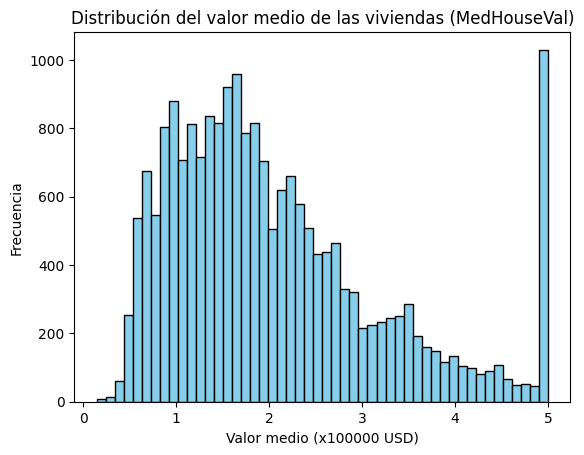

In [ ]:
plt.hist(df["MedHouseVal"], bins=50, color="skyblue", edgecolor="black")
plt.title("Distribución del valor medio de las viviendas (MedHouseVal)")
plt.xlabel("Valor medio (x100000 USD)")
plt.ylabel("Frecuencia")
plt.show()

## Visualizar relaciones

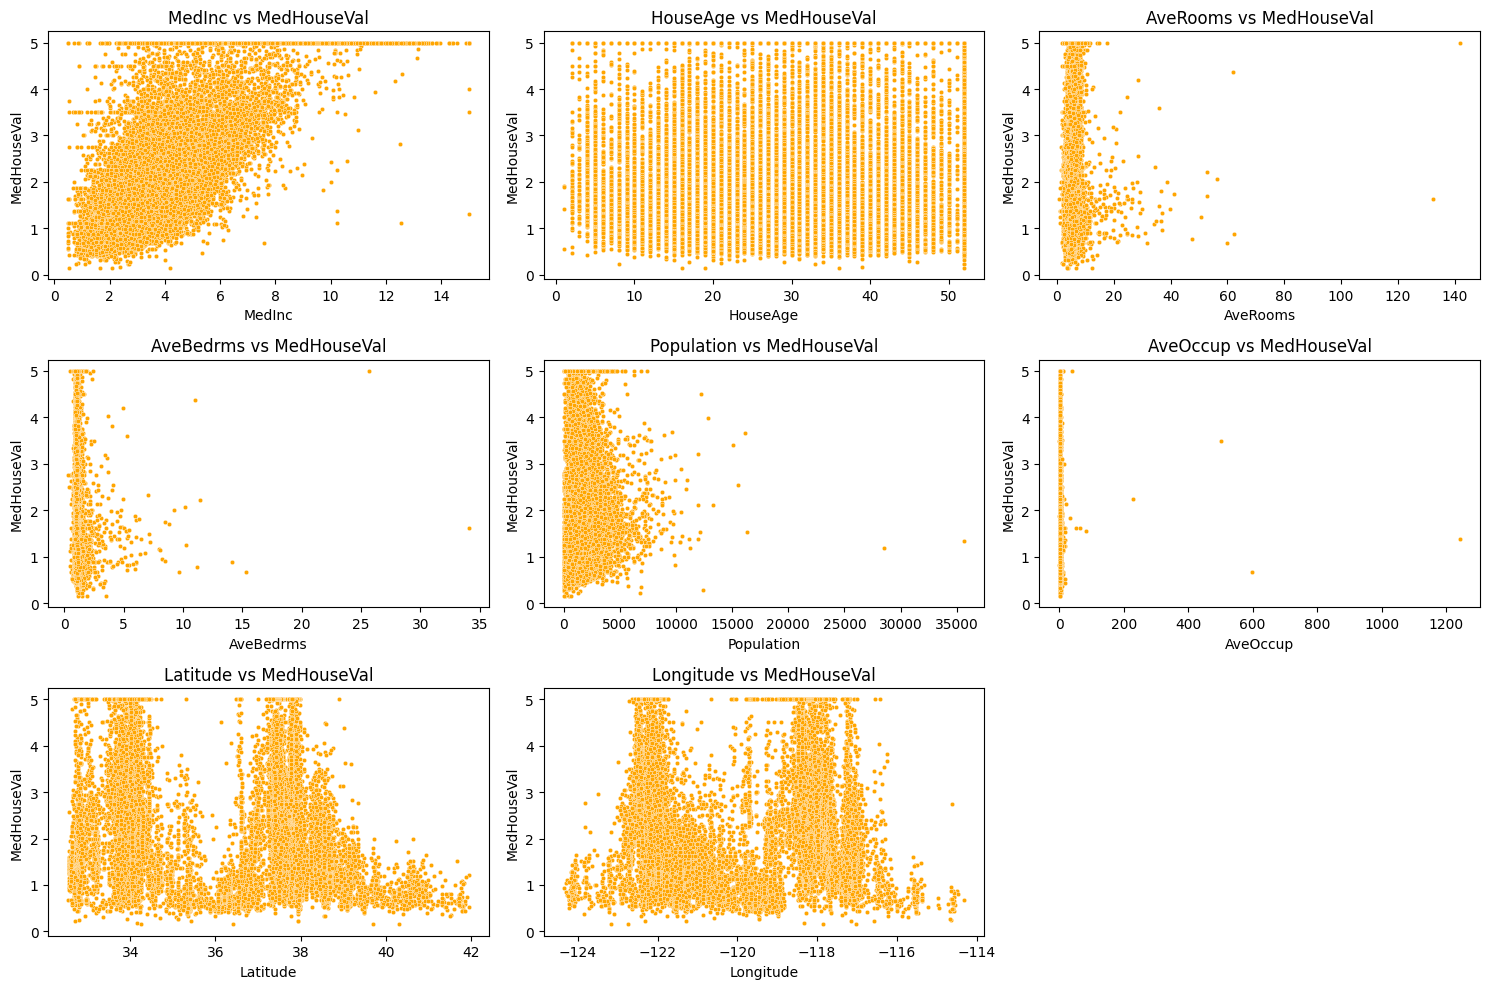

In [ ]:
import seaborn as sns

# Variables explicativas (posibles X)
variables_x = ["MedInc", "HouseAge", "AveRooms", "AveBedrms",
               "Population", "AveOccup", "Latitude", "Longitude"]

plt.figure(figsize=(15, 10))
for i, col in enumerate(variables_x):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x=df[col], y=df["MedHouseVal"], color="orange", s=10)
    plt.xlabel(col)
    plt.ylabel("MedHouseVal")
    plt.title(f"{col} vs MedHouseVal")
plt.tight_layout()
plt.show()


## REGRESIONES LINEALES SIMPLES PARA TODAS LAS VARIABLES

In [ ]:
import numpy as np

# Calcular regresión lineal
def regresion_lineal_simple(x, y):
    n = len(x)
    mean_x = sum(x) / n
    mean_y = sum(y) / n

    num = sum((x[i] - mean_x) * (y[i] - mean_y) for i in range(n))
    den = sum((x[i] - mean_x) ** 2 for i in range(n))

    b1 = num / den
    b0 = mean_y - b1 * mean_x

    y_pred = [b0 + b1 * xi for xi in x]

    # Calcular R²
    ss_tot = sum((yi - mean_y) ** 2 for yi in y)
    ss_res = sum((y[i] - y_pred[i]) ** 2 for i in range(n))
    r2 = 1 - (ss_res / ss_tot)

    return b0, b1, r2

# Evaluar todas las posibles relaciones
resultados = []
for col in variables_x:
    x = df[col].tolist()
    y = df["MedHouseVal"].tolist()

    b0, b1, r2 = regresion_lineal_simple(x, y)
    resultados.append((col, round(b1, 4), round(b0, 4), round(r2, 4)))


print(f"{'Variable X':<12} {'Pendiente':<10} {'Intercepto':<12} {'R²':<6}")
print("-" * 45)
for r in resultados:
    print(f"{r[0]:<12} {r[1]:<10} {r[2]:<12} {r[3]:<6}")


mejor = max(resultados, key=lambda x: x[3])
print(f"\n Mejor variable predictora: {mejor[0]} (R² = {mejor[3]})")

Variable X   Pendiente  Intercepto   R²    
---------------------------------------------
MedInc       0.4179     0.4509       0.4734
HouseAge     0.0097     1.7912       0.0112
AveRooms     0.0709     1.6838       0.0231
AveBedrms    -0.1137    2.1933       0.0022
Population   -0.0       2.1044       0.0006
AveOccup     -0.0026    2.0767       0.0006
Latitude     -0.0779    4.8437       0.0208
Longitude    -0.0265    -1.097       0.0021

 Mejor variable predictora: MedInc (R² = 0.4734)


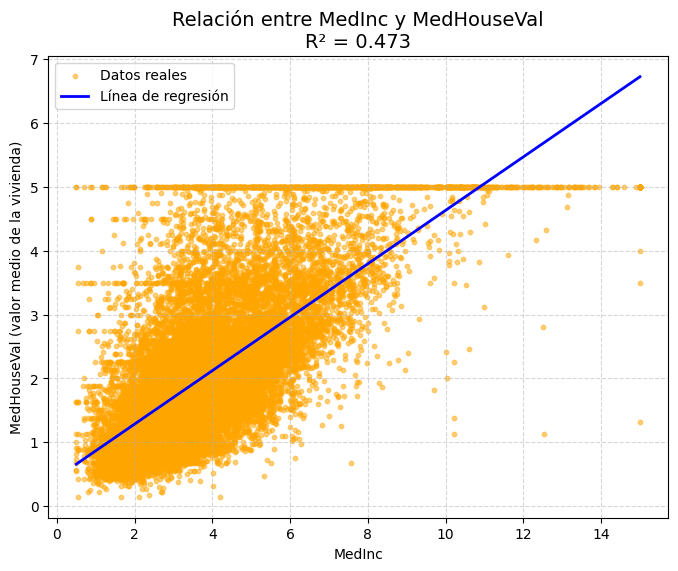

In [ ]:
import matplotlib.pyplot as plt

# Extraer los datos de la mejor variable
best_var = mejor[0]
x = df[best_var].tolist()
y = df["MedHouseVal"].tolist()

# Volvemos a calcular la regresión para graficar
b0, b1, r2 = regresion_lineal_simple(x, y)

# Generar puntos de predicción
x_sorted = sorted(x)
y_pred = [b0 + b1 * xi for xi in x_sorted]

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color="orange", s=10, alpha=0.5, label="Datos reales")
plt.plot(x_sorted, y_pred, color="blue", linewidth=2, label=f"Línea de regresión")

plt.title(f"Relación entre {best_var} y MedHouseVal\nR² = {round(r2, 3)}", fontsize=14)
plt.xlabel(best_var)
plt.ylabel("MedHouseVal (valor medio de la vivienda)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

## Interpretación final

* El ingreso medio (MedInc) tiene la relación más fuerte con el valor de las viviendas.

* Otras variables tienen cierta correlación, pero son mucho más débiles.

* Esto refleja una realidad económica: zonas con mayor ingreso medio tienden a tener viviendas más caras.